In [1]:
install.packages("tidyverse")
remotes::install_github("bradleyboehmke/harrypotter")
install.packages("tidytext")
library(tidyverse)
library(stringr)
options(jupyter.rich_display=T)
library(harrypotter)
library(tidytext)
options(repr.plot.width=4, repr.plot.height=3)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘conflicted’, ‘jsonlite’, ‘ragg’, ‘stringr’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpquI9Yi/remotes108978b530c8/bradleyboehmke-harrypotter-51f7146/DESCRIPTION’ ... OK
* preparing ‘harrypotter’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘harrypotter_0.1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘SnowballC’, ‘janeaustenr’, ‘tokenizers’


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# STATS 306
## Homework 7: Text Analysis

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Sentiment Analysis (4 points)

In problem 1 we will perform *sentiment analysis* of the Harry Potter books. The file `afinn.RData` contains a sentiment score for a large number of words in the English language:

In [2]:
load(url("https://datasets.stats306.org/afinn.RData"))
head(afinn)

word,value
<chr>,<dbl>
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2


Negatively connoted words receive low scores, while positively connoted words receive high scores:

In [3]:
filter(afinn, word %in% c("death", "hurrah"))

word,value
<chr>,<dbl>
death,-2
hurrah,5


The `tidytext::unnest_tokens()` function can be used to break a chunk of text into "tokens" (words, sentences, etc.) It works as follows. Consider the following tibble, which contains all 17 chapters of the first book in the Harry Potter series:

In [4]:
phil_tbl <- tibble(chapter=seq_along(philosophers_stone), 
                   text=philosophers_stone) %>% print

# A tibble: 17 × 2
   chapter text                                                                 
     <int> <chr>                                                                
 1       1 "THE BOY WHO LIVED　　Mr. and Mrs. Dursley, of number four, Privet D…
 2       2 "THE VANISHING GLASS　　Nearly ten years had passed since the Dursle…
 3       3 "THE LETTERS FROM NO ONE　　The escape of the Brazilian boa constric…
 4       4 "THE KEEPER OF THE KEYS　　BOOM. They knocked again. Dudley jerked a…
 5       5 "DIAGON ALLEY　　Harry woke early the next morning. Although he coul…
 6       6 "THE JOURNEY FROM PLATFORM NINE AND THREE-QUARTERS　　Harry's last m…
 7       7 "THE SORTING HAT　　The door swung open at once. A tall, black-haire…
 8       8 "THE POTIONS MASTER　　There, look.\"　　\"Where?\"　　\"Next to the…
 9       9 "THE MIDNIGHT DUEL　　Harry had never believed he would meet a boy h…
10      10 "HALLOWEEN　　Malfoy couldn't believe his eyes when he saw that Harr…
11      11 "QUIDDITCH　　As they en

To perform sentiment analysis, we need to break each chapter into words so that we can join it to the `afinn` table. This is what `unnest_tokens()` does:

In [5]:
phil_tok <- unnest_tokens(phil_tbl, input=text, output=word) %>% print

# A tibble: 77,875 × 2
   chapter word   
     <int> <chr>  
 1       1 the    
 2       1 boy    
 3       1 who    
 4       1 lived  
 5       1 mr     
 6       1 and    
 7       1 mrs    
 8       1 dursley
 9       1 of     
10       1 number 
# ℹ 77,865 more rows


**1(a)** By joining this table to other tables containing text data and summarizing, we can generate scores of how positive or negative the text is. Using the table and `afinn`, we can assign sentiment scores to various portions of text. Generate a plot reflecting how the sentiment changes over 17 chapters of the first book in the Harry Potter series. What conclusion can you draw from the plot? (1 point)

Based on the plot below I can conclude that the beginning and end chapters appear to have lower sentiment scores compared to the middle chapters. It varies chapter to chapter, but this appears to be the overall trend.

Joining with `by = join_by(word)`
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


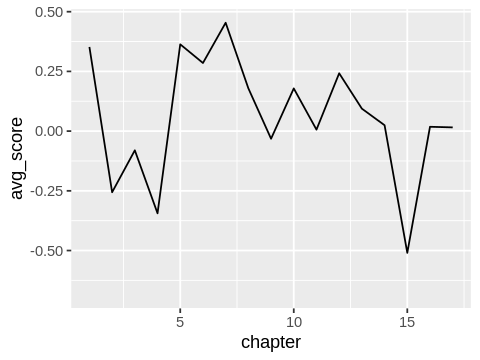

In [6]:
### YOUR SOLUTION HERE
afinn %>% left_join(phil_tok) %>% group_by(chapter) %>% mutate(avg_score = mean(value, na.rm = TRUE)) %>% 
  select(chapter, avg_score) %>% unique() %>%
  ggplot(aes(x=chapter, y=avg_score)) + geom_line()

**1(b)**
Some people say that the Harry Potter books became darker (more negative) over time. Use sentiment analysis to investigate this, and report your conclusion here. (1 point)

**HINT**: A list of all the Harry Potter books can be obtained by looking at the help page for the `harrypotter` package.

Based on the table below it doesn't appear that the Harry Potter books become more negative over time, as the average sentiment scores appears to stay pretty negative throughout all of the books.

`summarise()` has grouped output by 'book'. You can override using the
`.groups` argument.


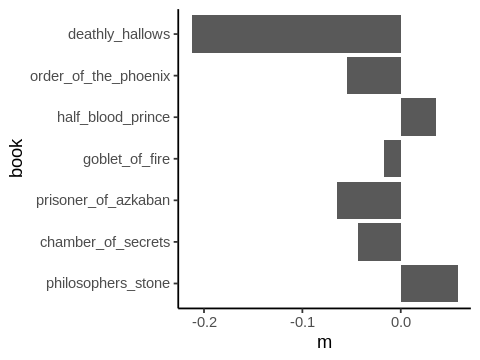

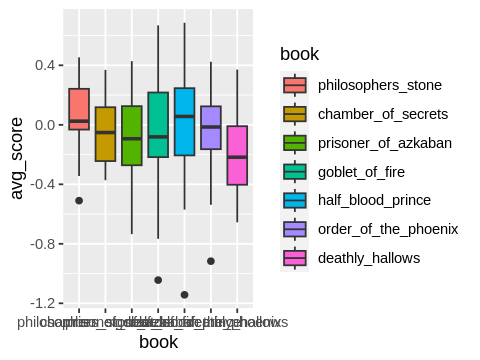

In [9]:
### YOUR SOLUTION HERE
#pris_tok <- unnest_tokens(tibble(chapter=seq_along(prisoner_of_azkaban), 
      #             text=prisoner_of_azkaban), input=text, output=word)
#pris_avg <- afinn %>% left_join(pris_tok) %>% summarize(mean(value, na.rm = FALSE))
#order_tok <- unnest_tokens(tibble(chapter=seq_along(order_of_the_phoenix), 
 #                  text=order_of_the_phoenix), input=text, output=word) 
#order_avg <- afinn %>% left_join(order_tok) %>% summarize(mean(value, na.rm = FALSE))
#half_tok <- unnest_tokens(tibble(chapter=seq_along(half_blood_prince), 
 #                  text=half_blood_prince), input=text, output=word)
#half_avg <- afinn %>% left_join(half_tok) %>% summarize(mean(value, na.rm = FALSE))
#goblet_tok <- unnest_tokens(tibble(chapter=seq_along(goblet_of_fire), 
 #                  text=goblet_of_fire), input=text, output=word)
#goblet_avg <- afinn %>% left_join(goblet_tok) %>% summarize(mean(value, na.rm = FALSE))
#deathly_tok <- unnest_tokens(tibble(chapter=seq_along(deathly_hallows), 
  #                 text=deathly_hallows), input=text, output=word)
#deathly_avg <- afinn %>% left_join(deathly_tok) %>% summarize(mean(value, na.rm = FALSE))
#chamber_tok <- unnest_tokens(tibble(chapter=seq_along(chamber_of_secrets), 
 #                  text=chamber_of_secrets), input=text, output=word)
#chamber_avg <- afinn %>% left_join(chamber_tok) %>% summarize(mean(value, na.rm = FALSE))
#phil_avg <- afinn %>% left_join(phil_tok) %>% summarize(mean(value, na.rm = FALSE))
#tibble(x = c("Philosophers Stone", "Chamber of Secrets", "Prisoner of Azkaban", "Goblet of Fire",
#"Order of the Pheonix", "Half Blood Prince", "Deathly Hallows"),
#y=c(phil_avg, chamber_avg, pris_avg, goblet_avg, order_avg, half_avg, deathly_avg)) 
books = c("philosophers_stone", "chamber_of_secrets", "prisoner_of_azkaban",
"goblet_of_fire", "half_blood_prince", "order_of_the_phoenix",
"deathly_hallows")
map_dfr(books, ~ tibble(book =., chapter=seq_along(get(.)), text=get(.))) %>%
  unnest_tokens(input=text, output=word) %>%
  inner_join(afinn, by="word") %>% group_by(book) %>%
  summarize(m=mean(value)) %>%
  mutate(book = factor(book, levels=books)) %>%
  arrange(desc(book)) %>%
  ggplot + geom_col(aes(x=book, y=m)) + coord_flip() + theme_classic()
map_dfr(books, ~ tibble(book = ., chapter=seq_along(get(.)), text=get(.))) %>%
  unnest_tokens(input=text, output=word) %>%
  inner_join(afinn, by="word") %>%
  group_by(book, chapter) %>%
  summarize(avg_score=mean(value)) %>%
  mutate(book = factor(book, levels=books)) %>%
  arrange(desc(book)) %>%
  ggplot(aes(x=book, y=avg_score, fill=book)) + geom_boxplot() 

**1(c)** According to the sentiment scores, what are the most negative and positive chapters in any of the Harry Potter books? (1 point)

Half Blood Prince Chapter 9 is the most positive. Half Blood Prince Chapter 28 is the most negative.

In [10]:
### YOUR SOLUTION HERE
#pris <- afinn %>% left_join(pris_tok) %>% group_by(chapter) %>% 
 # mutate(avg_score = mean(value, na.rm = TRUE)) %>% select(chapter, avg_score) %>% unique() %>% arrange(desc(-avg_score))
#order <- afinn %>% left_join(order_tok) %>% group_by(chapter) %>% 
#  mutate(avg_score = mean(value, na.rm = TRUE)) %>% select(chapter, avg_score) %>% unique() %>% arrange(desc(-avg_score)) 
#half <- afinn %>% left_join(half_tok) %>% group_by(chapter) %>% 
#  mutate(avg_score = mean(value, na.rm = TRUE)) %>% select(chapter, avg_score) %>% unique() %>% arrange(desc(-avg_score)) 
#goblet <- afinn %>% left_join(goblet_tok) %>% group_by(chapter) %>% 
#  mutate(avg_score = mean(value, na.rm = TRUE)) %>% select(chapter, avg_score) %>% unique() %>% arrange(desc(-avg_score)) 
#deathly <- afinn %>% left_join(deathly_tok) %>% group_by(chapter) %>% 
#  mutate(avg_score = mean(value, na.rm = TRUE)) %>% select(chapter, avg_score) %>% unique() %>% arrange(desc(-avg_score)) 
#chamber <- afinn %>% left_join(chamber_tok) %>% group_by(chapter) %>% 
#  mutate(avg_score = mean(value, na.rm = TRUE)) %>% select(chapter, avg_score) %>% unique() %>% arrange(desc(-avg_score)) 
#phil <- afinn %>% left_join(phil_tok) %>% group_by(chapter) %>% 
 # mutate(avg_score = mean(value, na.rm = TRUE)) %>% select(chapter, avg_score) %>% unique() %>% arrange(desc(-avg_score)) 
#rbind(pris, order, half, goblet, deathly, chamber, phil) %>% arrange(desc(avg_score))
map_dfr(books, ~ tibble(book = ., chapter=seq_along(get(.)), text=get(.))) %>%
  unnest_tokens(input=text, output=word) %>%
  inner_join(afinn, by="word") %>% group_by(book, chapter) %>%
  summarize(avg_score=mean(value), abs_avg_score=abs(avg_score)) %>%
  group_by(avg_score>0) %>% top_n(1, abs_avg_score)

`summarise()` has grouped output by 'book'. You can override using the
`.groups` argument.


book,chapter,avg_score,abs_avg_score,avg_score > 0
<chr>,<int>,<dbl>,<dbl>,<lgl>
half_blood_prince,9,0.6862745,0.6862745,TRUE
half_blood_prince,28,-1.1428571,1.1428571,FALSE


**1(d)** Of the sentences that contain three or more scored words, what is the happiest (most positive)? (1 points)

In [11]:
### YOUR SOLUTION HERE
map_dfr(books, ~tibble(book=., chapter=seq_along(get(.)), text=get(.))) %>%
  unnest_tokens(input=text, output=sentence, token="sentences") %>%
  unnest_tokens(input=sentence, output=word, drop=F) %>%
  inner_join(afinn, by="word") %>%
  group_by(book, chapter, sentence) %>%
  summarize(avg_score = mean(value), abs_avg_score=abs(avg_score), n=n()) %>%
  filter(n>=3) %>%
  group_by(avg_score>0) %>%
  top_n(1, abs_avg_score)

`summarise()` has grouped output by 'book', 'chapter'. You can override using
the `.groups` argument.


book,chapter,sentence,avg_score,abs_avg_score,n,avg_score > 0
<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<lgl>
deathly_hallows,2,"he wondered what his aunt and uncle would do with them; burn them in the dead of night, probably, as if they were evidence of some dreadful crime.",-3.0,3.0,3,FALSE
deathly_hallows,24,"""you turn up here with a dead house-elf and a half-conscious goblin, hermione looks as though she's been tortured, and ron's just refused to tell me anything ¨c """"we can't tell you what we're doing,"" said harry flatly.",-3.0,3.0,3,FALSE
deathly_hallows,31,"she concealed her loss, my dreadful betrayal, even from the other founders of hogwarts.""""",-3.0,3.0,3,FALSE
order_of_the_phoenix,13,"she's evil, he thought, as he climbed a staircase to the seventh floor, she's an evil, twisted, mad old- 'ron?'",-3.0,3.0,3,FALSE
order_of_the_phoenix,13,"this is your punishment for spreading evil, nasty, attention-seeking stories, mr potter, and punishments certainly cannot be adjusted to suit the guilty one's convenience.",-3.0,3.0,3,FALSE
order_of_the_phoenix,24,"maniacal laughter was ringing in his ears . . . he was happier than he had been in a very long time . . . jubilant, ecstatic, triumphant . . . a wonderful, wonderful thing had happened . . .",3.8,3.8,5,TRUE
order_of_the_phoenix,31,"he might as well have tried to see moving pictures on the desktop as in the stubbornly blank crystal ball; he lost his head completely during tea-leaf reading, saying it looked to him as though professor marchbanks would shortly be meeting a round, dark, soggy stranger, and rounded off the whole fiasco by mixing up the life and head lines on her palm and informing her that she ought to have died the previous tuesday.",-3.0,3.0,3,FALSE
order_of_the_phoenix,35,"don't let her be dead, don't let her be dead, it's my fault if she's dead . . .",-3.0,3.0,3,FALSE
prisoner_of_azkaban,2,"if there's something wrong with the bitch, there'll be something wrong with the pup --"" at that moment, the wineglass aunt marge was holding exploded in her hand.",-3.0,3.0,3,FALSE


## Problem 2: Reddit dataset (4 points)
The file `reddit_xmas_2017.RData` contains 100,000 comments posted to Reddit on Christmas Day, 2017. Unless specified otherwise, all matches are case insensitive.

In [12]:
load(url('https://datasets.stats306.org/reddit_xmas_2017.RData'))
reddit %>% print

# A tibble: 100,000 × 3
   author              body                                  created_utc        
   <chr>               <chr>                                 <dttm>             
 1 br_shadow           "Thank you for this, there is a pers… 2017-12-25 15:49:08
 2 Ksalol              "They are not to quick actually. It'… 2017-12-25 17:42:50
 3 itscool83           "tell her you guys should hang out w… 2017-12-25 18:54:13
 4 Glu7enFree          "Autism is a high honor in the tech … 2017-12-25 07:48:17
 5 Theotheogreato      "You thought a cat was your son?! "   2017-12-25 20:58:08
 6 Shadrac121          "Hopfully she takes wat people say i… 2017-12-25 22:27:31
 7 1fzUjhemoSB1QV7zI7  "Si ce propui sa facem cu toata piel… 2017-12-25 07:41:31
 8 MinisterOfEducation "I don't mean to be impolite, but if… 2017-12-25 19:28:35
 9 AabidS10            "i dont have a 720p x265 of it, sorr… 2017-12-25 13:20:32
10 S3RG10              "I'm dying to try Guatemalan sandals… 2017-12-25 00:48:46
# ℹ 

Comment 174 wishes everyone a happy holidays:

In [ ]:
reddit %>% slice(174)

author,body,created_utc
<chr>,<chr>,<dttm>
Bareilles,Thank you. Happy holidays everyone!,2017-12-25 01:33:50


**2(a)**  What are other people wishing? Count the first occurrence of the string "Happy `<word>`" or "Merry `<word>`" in the comment body, if any, count the matches. To keep things interesting, do *not* include phrases matching `(happy|merry) (to|with|for|about|and|that|if|i|you|when)`. 

Print a table containing the top 10 matches; a few of the rows are:

<table>
<thead>
    <tr><th scope="col">greeting</th><th scope="col">n</th></tr>
    <tr><th scope="col">&lt;chr&gt;</th><th scope="col">&lt;int&gt;</th></tr>
</thead>
<tbody>
    <tr><td>merry christmas</td><td>2040</td></tr>
    <tr><td>happy holidays </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td>   7</td></tr>
    <tr><td>happy cakeday  </td><td>   6</td></tr>
</tbody>
</table>

Your numbers may vary slightly depending on how you performed the match.

In [14]:
### YOUR SOLUTION HERE
#x <- "(happy |merry )\\w+"
#greetings <- reddit %>%  mutate(lowercase = str_to_lower(body)) %>%
 #   mutate(greeting = str_extract(lowercase, x)) %>% filter(greeting != TRUE) %>%
  #  group_by(greeting) %>% summarize(n = n()) %>% arrange(desc(n))
#greetings %>% top_n(10)
reddit %>% mutate(greeting = str_extract(str_to_lower(body), 
"(happy|merry) \\w+")) %>%
  filter(!is.na(greeting)) %>% count(greeting) %>%
  filter(!str_detect(greeting, '(happy|merry) (to|with|for|about|and|that|if|i|you|when)')) %>%
  arrange(-n) %>% slice(1:10)

greeting,n
<chr>,<int>
merry christmas,2040
happy holidays,477
merry xmas,93
happy christmas,44
happy cake,28
happy birthday,23
happy new,15
happy holiday,13
merry x,7


**2(b)** Find the number of times `christmas`or `xmas` mentioned each hour. Similarly, find the number of mentions per hour of `snow` or `flakes`. Draw a plot comparing these two time series. (1 point)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




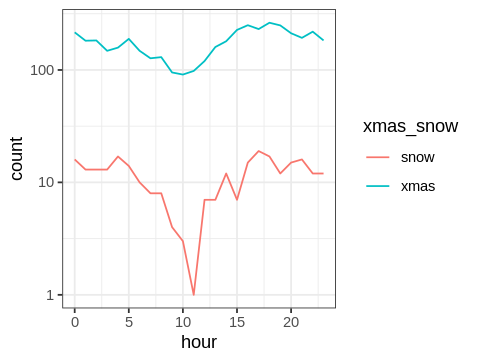

In [16]:
### YOUR SOLUTION HERE
#reddit %>% mutate(lowercase = str_to_lower(body)) %>% 
  #  mutate(word = str_extract(lowercase, x)) %>% mutate(hour = lubridate::hour(created_utc)) %>%
  #  filter(word != TRUE) %>%
  #  group_by(hour) %>% summarize(count = n()) %>% ggplot() + 
  #  geom_col(mapping = aes(x = hour, y = count))
#x <- "(snow|flakes)\\b"
#reddit %>% mutate(lowercase = str_to_lower(body)) %>% 
 #   mutate(word = str_extract(lowercase, x)) %>% mutate(hour = lubridate::hour(created_utc)) %>%
  #  filter(word != TRUE) %>%
  #  group_by(hour) %>% summarize(count = n()) %>% ggplot() + 
  #  geom_col(mapping = aes(x = hour, y = count))
library(lubridate)
options(repr.plot.width=4, repr.plot.height=3)
reddit %>% mutate(hour=hour(created_utc)) %>%
  mutate(xmas = str_detect(body, regex("christmas|xmas", ignore_case=T))) %>%
  mutate(snow = str_detect(body, regex("snow|flakes", ignore_case=T))) %>%
  group_by(hour) %>%
  summarize(xmas = sum(xmas), snow = sum(snow)) %>%
  pivot_longer(!hour, names_to="xmas_snow", values_to="count") %>%
  ggplot(aes(x=hour, y=count, color=xmas_snow)) + geom_line() + theme_bw() +
  scale_y_continuous(trans='log10')

**2(c)** On Christmas Day, the word `christmas` occurs 4264 times. What is the next most common word after Christmas, and how many times does it appear? (1 point)

Only is the most common word after Christmas and it appears 4155 times.

In [17]:
### YOUR SOLUTION HERE
#tbl <- reddit %>% mutate(word = str_extract_all(str_to_lower(body), "[a-z]+")) %>% unnest(word) %>% group_by(word) %>% summarize(n = n()) %>%
  #arrange(desc(n))
#tbl[50:100,]
ds <- reddit %>% mutate(words=str_extract_all(body, regex("\\b[a-z']+\\b", ignore_case=T))) %>%
  unnest %>% mutate(words = str_to_lower(words)) %>% count(words) %>%
  arrange(desc(n)) %>% mutate(k=row_number())
filter(ds, words == "christmas")
filter(ds, k == 77)

Warning message:
“`cols` is now required when using `unnest()`.
ℹ Please use `cols = c(words)`.”


words,n,k
<chr>,<int>,<int>
christmas,4264,76


words,n,k
<chr>,<int>,<int>
only,4151,77


**2(d)** Using `afinn` dataset, calculate the average sentiment scores of reddit comments for each hour. When is the most positive time in Christmas Day? (1 point)

Hour 4 of Christmas Day is the most positive time.

In [19]:
### YOUR SOLUTION HERE
#reddit %>% mutate(lowercase = str_to_lower(body)) %>% 
  #  mutate(word = str_extract_all(lowercase, "[a-z]+")) %>% unnest(word) %>% left_join(afinn) %>% 
   #   mutate(hour = lubridate::hour(created_utc)) %>%
  # group_by(hour) %>% summarize(avg_score = mean(value)) %>% ggplot(aes(x = hour, y = avg_score)) + 
  #  geom_col()
reddit %>% mutate(hour=hour(created_utc)) %>%
  unnest_tokens(input=body, output=word) %>%
  inner_join(afinn, by="word") %>%
  group_by(hour) %>%
  summarize(avg_score = mean(value)) %>%
  top_n(1, avg_score)

hour,avg_score
<int>,<dbl>
4,0.989179


## Challenge Problem: Text Ranking (2 points)
Not all terms/words are equally important, and some carry more information about contents. But how do we measure the importance? One popular method is using TF-IDF (term frequency–inverse document frequency). TF-IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection. Term Frequency measures the relative frequency of term within document. Inverse Document Frequency measures of how much information the word provides for the collection. 

We defined TF-IDF as:
$$\text{TF-IDF} = \operatorname{TF}(t,d) \times \operatorname{IDF}(t)$$
$$\operatorname{TF}(t, d) = \log(1+c(t,d))$$
$$\operatorname{IDF}(t) = 1 + \log(N/k)$$
where $c(t,d)$ is the frequency count of term $t$ in document $d$, $N$ is the total number of documents in the collection, $k$ is the number
of documents containing term $t$


**(a)** Consider the Harry Potter series as a collection of documents(books), find top 5 words in each book ranked by TF-IDF. Comment on your finding. (1 point) 

_Hint_: You can either compute this by hand, using the definitions shown above, or employ built-in functions in the `tidytext` package.

In [20]:
### YOUR SOLUTION HERE
df3a <- map_dfr(books, ~tibble(book=., chapter=seq_along(get(.)), text=get(.))) %>%
  unnest_tokens(input=text, output=word, drop=T) %>%
  group_by(book, word) %>% mutate(tf = log(n() + 1)) %>%
  group_by(word) %>% mutate(idf = 1 + log(7/n_distinct(book)), tf_idf=tf * idf) %>%
  distinct(book, word, .keep_all = TRUE) %>%
  mutate(book = factor(book, levels=books)) %>% arrange(desc(book)) %>%
  group_by(book) %>% arrange(desc(tf_idf), .by_group=T) %>%
  slice(1:5)
df3a

book,chapter,word,tf,idf,tf_idf
<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>
philosophers_stone,4,mom,2.890372,2.945910,8.514775
philosophers_stone,1,the,8.196988,1.000000,8.196988
philosophers_stone,1,and,7.562162,1.000000,7.562162
philosophers_stone,1,to,7.529406,1.000000,7.529406
philosophers_stone,1,a,7.433667,1.000000,7.433667
chamber_of_secrets,1,the,8.315566,1.000000,8.315566
chamber_of_secrets,3,gilderoy,3.663562,2.252763,8.253136
chamber_of_secrets,3,lockhart,5.288267,1.559616,8.247665
chamber_of_secrets,1,and,7.681099,1.000000,7.681099


**(b)** Stop words are a set of commonly used words in a language like "the", "of", "and", "to", "a". The `stop_words` table contains a list of such words. If you ignore all the words in `stop_words`, what are the top 10 words (again ranked by TF-IDF) in each Harry Potter book? (1 point)

_Hint_: use `anti_join` to exclude words in `stop_words`.

In [ ]:
### YOUR SOLUTION HERE
